<h1 style='color:blue'> Estatística Descritiva com R: Frequências e Medidas </h1>

Seja bem-vindo ao meu Jupyter Notebook sobre Estatística Descritiva com R: Frequências e Medidas. Este notebook tem como objetivo apresentar conceitos e técnicas fundamentais para análise exploratória de dados utilizando a linguagem de programação R.

A estatística descritiva é uma área fundamental da estatística que tem como objetivo descrever e resumir as características de um conjunto de dados. Neste notebook, vamos explorar técnicas para calcular frequências e medidas estatísticas como a média, mediana e desvio padrão, além de criar gráficos para visualizar os dados.

Para acompanhar este notebook, é necessário ter conhecimento básico em R e em estatística descritiva. Caso você não tenha esses conhecimentos, recomenda-se estudá-los previamente antes de prosseguir com o notebook.

Ao final deste notebook, você terá conhecimentos fundamentais em estatística descritiva e será capaz de aplicar esses conhecimentos em seus próprios projetos de análise de dados. Vamos começar!

# 1 - Conhecendo os Dados

## 1.1 - Importando Dados

In [1]:
# Importando dados externos e atribuindo a uma variável dataframe
dados <- read.csv('/home/joeldspy/Modelos/datasets/estatistica.csv')

In [3]:
# Visualizando as 10 primeiras observações do nosso dataframe
head(dados, 5)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631


## 1.2 - Tipos de Variáveis

<img src='https://www.inf.ufsc.br/~andre.zibetti/probabilidade/img/classificacao_variaveis.png'>

- **Variáveis Qualitativas Nominais**

In [4]:
unique(dados$Sexo)

[1] 0 1

In [5]:
unique(dados$UF)

[1] 11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 29 31 32 33 35 41 42 43 50 51
[26] 52 53

In [6]:
unique(dados$Cor)

[1] 8 2 4 6 0

- **Variáveis Qualitativas Ordinais**

In [7]:
sort(unique(dados$Anos.de.Estudo))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

- **Variáveis Quantitativas Discretas**

In [8]:
sprintf('Idade varia de %d até %d', min(dados$Idade), max(dados$Idade))

[1] "Idade varia de 13 até 99"

- **Variáveis Quantitativas Contínuas**

In [9]:
sprintf('Renda varia de %.2f até %.2f', min(dados$Renda), max(dados$Renda))

[1] "Renda varia de 0.00 até 200000.00"

In [10]:
sprintf('Altura varia de %.2f até %.2f', min(dados$Altura), max(dados$Altura))

[1] "Altura varia de 1.34 até 2.03"

## 2 - Distribuições de Frequência

Uma contagem de padrões em cada variável, tendo técnicas diferentes de contagem pra cada variável

## 2.1 - Distribuição de Frequência para Variáveis Qualitativas

In [11]:
tabela_de_frequencia <- table(dados$Sexo)

tabela_de_frequencia


    0     1 
53250 23590 

In [13]:
tabela_de_probabilidade <- prop.table(tabela_de_frequencia)

tabela_de_probabilidade * 100


       0        1 
69.29984 30.70016 

In [14]:
tabela <- cbind(tabela_de_frequencia, tabela_de_probabilidade * 100)

tabela

,tabela_de_frequencia,
0,53250,69.29984
1,23590,30.70016


In [15]:
rownames(tabela) <- c('Masculino', 'Feminino')
colnames(tabela) <- c('Frequência', 'Porcentagem')

In [16]:
tabela

,Frequência,Porcentagem
Masculino,53250,69.29984
Feminino,23590,30.70016


In [17]:
dist_frequencia <- table(dados$Sexo, dados$Cor)
dist_frequencia 

   
        0     2     4     6     8
  0   256 22194  5502   235 25063
  1   101  9621  2889   117 10862

In [18]:
prop.table(dist_frequencia) * 100

   
             0          2          4          6          8
  0  0.3331598 28.8833941  7.1603332  0.3058303 32.6171265
  1  0.1314420 12.5208225  3.7597605  0.1522644 14.1358667

In [23]:
tabela <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), mean)

colnames(tabela) <- c('Não-informado', 'Amarelo', 'Branco', 'Pardo', 'Negro')
rownames(tabela) <- c('Masculino', 'Feminino')

tabela

,Não-informado,Amarelo,Branco,Pardo,Negro
Masculino,1081.711,2925.744,1603.862,4758.251,1659.577
Feminino,2464.386,2109.867,1134.596,3027.342,1176.759


## 2.2 - Distribuição de Frequência para Variáveis Quantitativas

In [24]:
min(dados$Renda)

[1] 0

In [25]:
max(dados$Renda)

[1] 200000

In [26]:
bins <- c(0, 1576, 3152, 7880, 15760, 200000)

In [27]:
labels <- c('E', 'D', 'C', 'B', 'A')

In [31]:
renda_classificacoes <- cut(x = dados$Renda, breaks = bins, labels = labels, include.lowest = TRUE)

renda_classificacoes[1:25]

[1] E E E C E E D D D E D D E D D C E C D E D C E E E
Levels: E D C B A

In [32]:
table(renda_classificacoes)

renda_classificacoes
    E     D     C     B     A 
49755 16700  7599  2178   608 

In [33]:
prop.table(table(renda_classificacoes)) * 100

renda_classificacoes
         E          D          C          B          A 
64.7514315 21.7334721  9.8893805  2.8344612  0.7912546 

# 3 - Análise Gráfica

In [34]:
options(repr.plot.width = 10, repr.plot.height = 8)

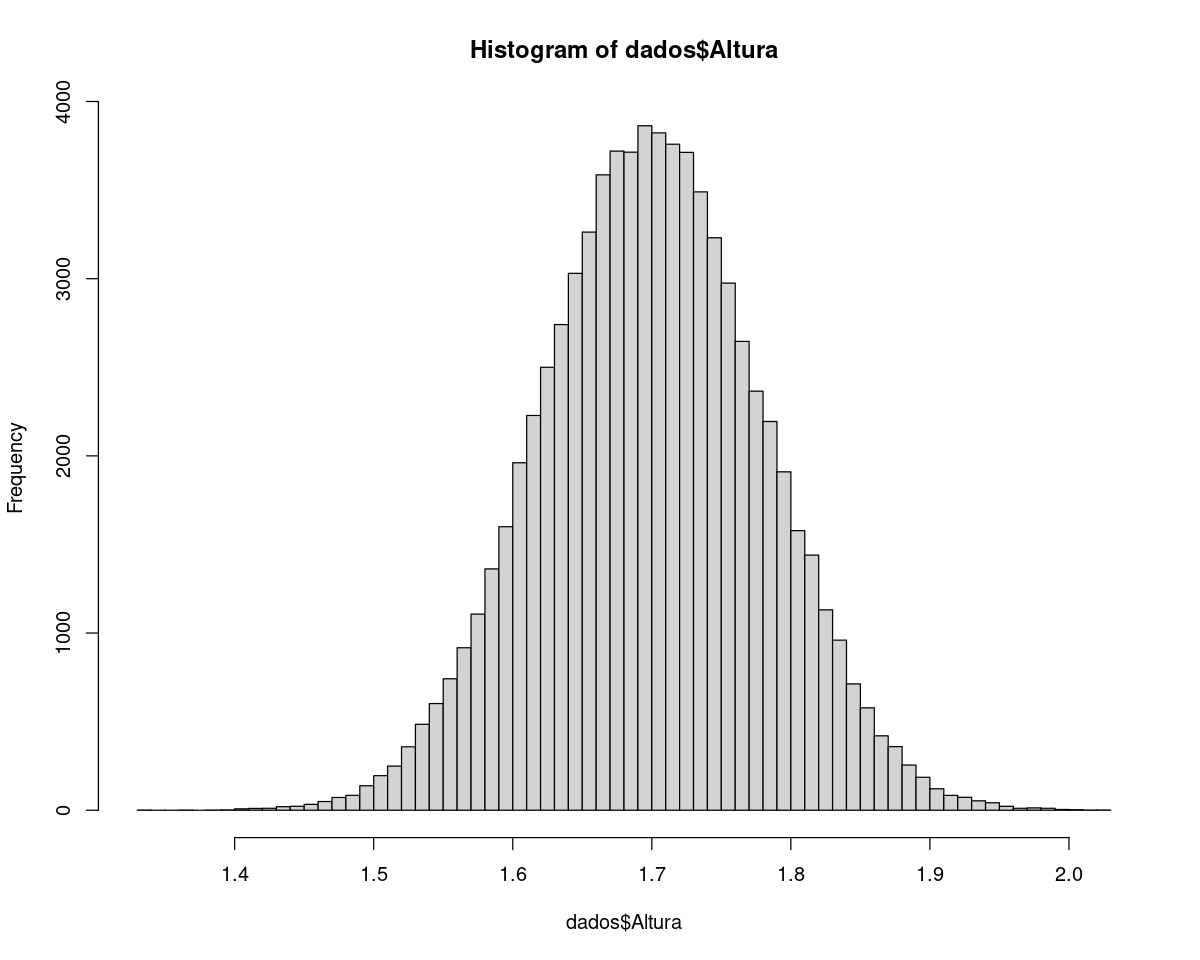

In [35]:
hist(dados$Altura, breaks=50)

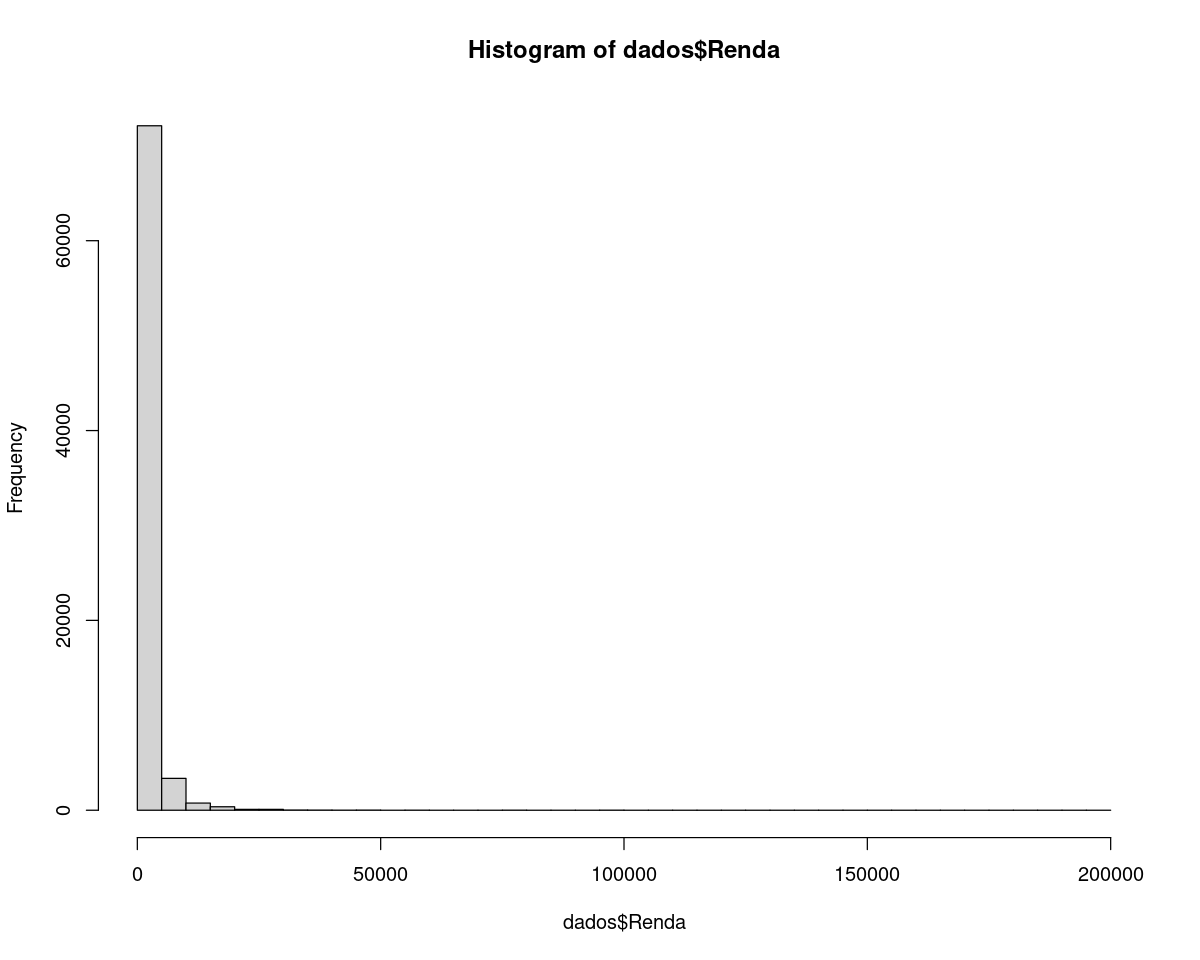

In [36]:
hist(dados$Renda, breaks=50)

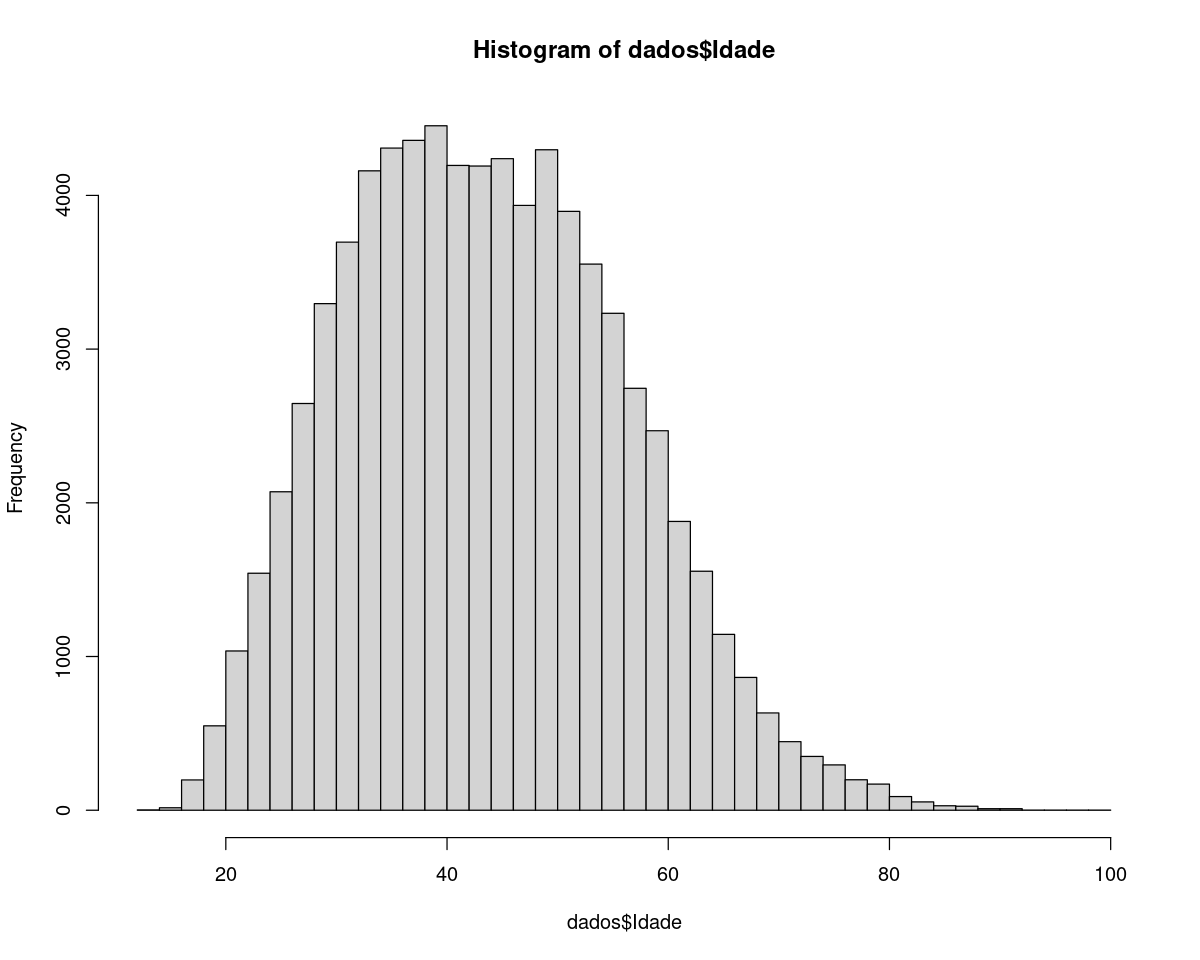

In [37]:
hist(dados$Idade, breaks=50)

## 4 - Medidas Resumo

In [38]:
notas_A <- c(5, 5, 5, 6, 5, 5, 5, 6, 5, 6)

notas_B <- c(3, 3, 5, 2, 10, 7, 0, 10, 5, 9)

In [39]:
notas_A

notas_B

[1] 5 5 5 6 5 5 5 6 5 6

[1]  3  3  5  2 10  7  0 10  5  9

In [42]:
mean(notas_A)

[1] 5.3

In [43]:
mean(notas_B)

[1] 5.4

In [44]:
sd(notas_A)

[1] 0.4830459

In [46]:
sd(notas_B) / sd(notas_A)

[1] 7.250616

In [48]:
notas_A

mean(notas_A)

[1] 5 5 5 6 5 5 5 6 5 6

[1] 5.3

In [49]:
salarios <- c(788, 1200, 600, 900, 27500)

mean(salarios)

[1] 6197.6

In [50]:
median(salarios)

[1] 900

In [54]:
salarios <- c(788, 1200, 600, 900, 1200, 1200, 900, 1200, 200000)

mean(salarios)

[1] 23109.78

In [55]:
median(salarios)

[1] 1200

In [56]:
moda <- function (dist) {
    return (table(dist))
}

In [57]:
moda(salarios)

dist
  600   788   900  1200 2e+05 
    1     1     2     4     1 